In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [2]:
rank, nneurons, n_outputs, samples = 10, 100, 50, 500

W_proj = np.random.randn(n_outputs, nneurons)
W_fb = np.random.randn(n_outputs, n_outputs)
np.fill_diagonal(W_fb, 0)
proj_mat = np.random.randn(nneurons, rank)
pcs = np.random.randn(rank, samples)

In [3]:
xs = np.tanh(proj_mat @ pcs)
pca = PCA()
pca.fit(xs.T)
components = pca.components_

In [123]:
rewarding_dim = 5

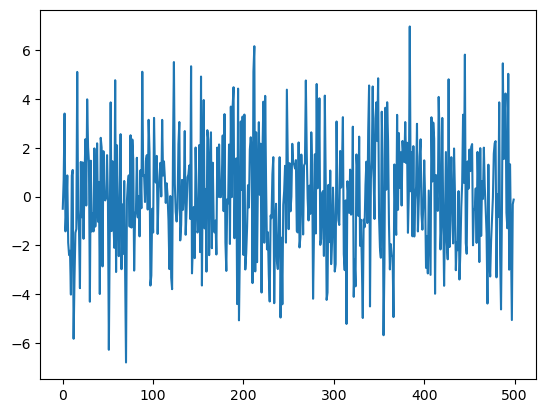

In [124]:
diff_xs = np.diff(xs, axis=1)
projection_values = xs.T @ components.T
rewarding_values = projection_values[:, rewarding_dim]
rewarding_values -= rewarding_values.mean()
plt.plot(rewarding_values)

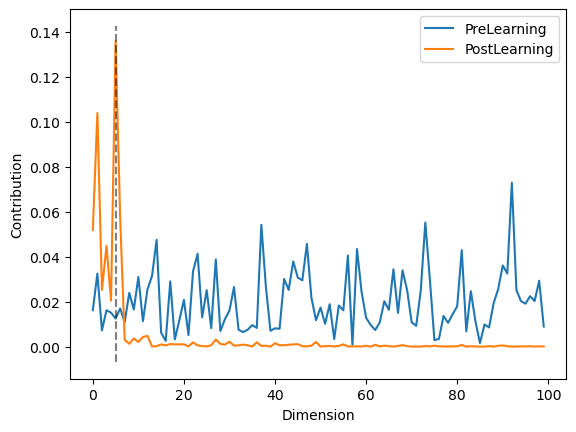

In [167]:
min_rank = 4
U = np.random.randn(nneurons, min_rank)
W = np.random.randn(min_rank, nneurons)
W_re = np.random.randn(min_rank)
u_dir = (U / np.linalg.norm(U, axis=0))
contributions = (u_dir.T @ components.T).squeeze() ** 2 ** 1/2
plt.plot(contributions.sum(axis=0), label='PreLearning')
lr = 1e-2
for ti in range(diff_xs.shape[1]):
    low_proj = W @ xs[:, ti] + W_re * rewarding_values[ti]
    du = lr * ((xs[:, ti][:, None] @ low_proj[:, None].T) - U) * rewarding_values[ti]
    U += du
    
u_dir = (U / np.linalg.norm(U))
contributions = (u_dir.T @ components.T).squeeze() ** 2 ** 1/2
plt.plot(contributions.sum(axis=0), label='PostLearning')
y_lims = plt.gca().get_ylim()
plt.vlines(x=rewarding_dim, ymin=y_lims[0], ymax=y_lims[1], color='k', ls='--', alpha=.5)
plt.xlabel('Dimension')
plt.ylabel('Contribution')
plt.legend()

In [158]:
u_dir.shape

(100, 4)

In [53]:
(diff_xs[:, ti][:, None] @ low_proj[:, None].T - U).shape

(100, 4)